# Pinterest dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Matplotlib created a temporary config/cache directory at /home/aaossa/.cache/matplotlib because the default path (/tmp/matplotlib-b6bov_ky) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv("data.csv")
data.head()

,board_id,im_name,timestamp
0,119134421331766936,58dcc5617e646ccd77205b4de9e01510,1447729447
1,119134421331766936,0aa168f8b273fab6f840713aeb2972eb,1447729447
2,119134421331766936,94cd90fd42a27abdd71b07dedd90aa9a,1447729447
3,119134421331766936,682b2df3f7e6ee4885c1a12b59a81dfa,1447729447
4,119134421331766936,5619b90d25f0adbec03ff9e201bf3d6a,1447729447


## Interactions data

In [3]:
print("Interactions shape", data.shape)

Interactions shape (2533806, 3)


There are 2533806 rows in the data file.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533806 entries, 0 to 2533805
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   board_id   int64 
 1   im_name    object
 2   timestamp  int64 
dtypes: int64(2), object(1)
memory usage: 58.0+ MB


In [5]:
data.isna().sum()

board_id     0
im_name      0
timestamp    0
dtype: int64

No missing values in this dataframe.

In [6]:
data.head()

,board_id,im_name,timestamp
0,119134421331766936,58dcc5617e646ccd77205b4de9e01510,1447729447
1,119134421331766936,0aa168f8b273fab6f840713aeb2972eb,1447729447
2,119134421331766936,94cd90fd42a27abdd71b07dedd90aa9a,1447729447
3,119134421331766936,682b2df3f7e6ee4885c1a12b59a81dfa,1447729447
4,119134421331766936,5619b90d25f0adbec03ff9e201bf3d6a,1447729447


In [7]:
data.describe()

,board_id,timestamp
count,2.533806e+06,2.533806e+06
mean,3.056261e+17,1.447861e+09
std,1.685477e+17,8.072419e+04
min,1.374390e+11,1.447729e+09
25%,1.619186e+17,1.447834e+09
50%,3.316480e+17,1.447861e+09
75%,4.412825e+17,1.447869e+09
max,5.763905e+17,1.448114e+09


**How many users and items?**

In [8]:
print("Users:", data["board_id"].nunique())
print("Items:", data["im_name"].nunique())

Users: 46000
Items: 882589


**Number of interactions per item?**

In [9]:
items = data.groupby(["im_name"]).count()["board_id"]
items.describe()

count    882589.000000
mean          2.870879
std           3.868655
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         177.000000
Name: board_id, dtype: float64

**Most active items?**

In [10]:
most_active_items = items.sort_values(ascending=False)
most_active_items.head()

im_name
e2f366ef70185c50be8df2e1ccd3fc56    177
f43c6933e5ee2e8f6e6037dce1b6dea2    135
67b78675b0f59e68b6a4879d0139da61    125
2c6b6a4957770aef2f7afe57f175f601    116
44305a011ac33e88ed616df7d4aad066    114
Name: board_id, dtype: int64

In [11]:
N = 88259  # 10%
interactions_by_active_items = most_active_items[:N].sum() / items.sum() * 100
print(f"{interactions_by_active_items:.2f} % of interactions comes from the top {N} most active items")

39.03 % of interactions comes from the top 88259 most active items


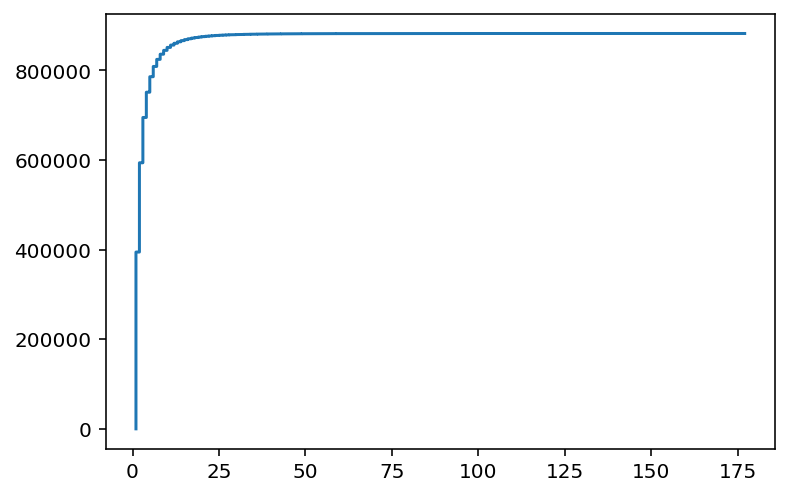

In [12]:
sorted_data = np.sort(most_active_items)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.show()

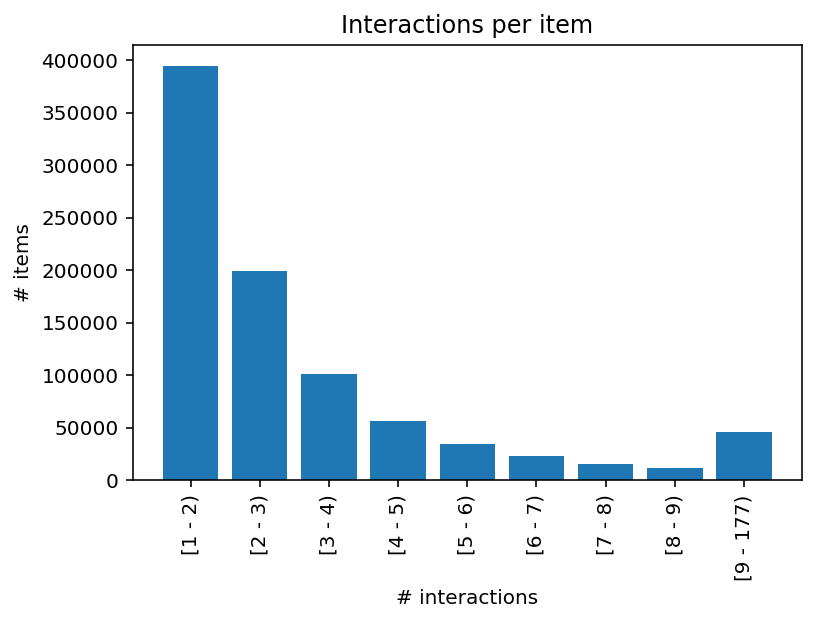

In [13]:
bins = list(range(1, 10)) + [items.max()]

hist, bins = np.histogram(items, bins)
x_axis = np.arange(0, len(hist))
plt.bar(x_axis, hist)
bin_names = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(hist))]
plt.xticks(x_axis, bin_names, rotation=90)

# Title and labels
plt.title("Interactions per item")
plt.xlabel("# interactions")
plt.ylabel("# items")
plt.show()

**Number of interactions per user?**

In [14]:
users = data.groupby(["board_id"]).count()["im_name"]
users.describe()

count    46000.000000
mean        55.082739
std         34.823345
min          9.000000
25%         27.000000
50%         45.000000
75%         76.000000
max        681.000000
Name: im_name, dtype: float64

**Most active users?**

In [15]:
most_active_users = users.sort_values(ascending=False)
most_active_users.head()

board_id
1407512322512278    681
1196406089989089    501
703824880761337     399
1407512322571860    385
1477881066765384    372
Name: im_name, dtype: int64

In [16]:
N = 4600  # 10%
interactions_by_active_users = most_active_users[:N].sum() / users.sum() * 100
print(f"{interactions_by_active_users:.2f} % of interactions comes from the top {N} most active users")

23.36 % of interactions comes from the top 4600 most active users


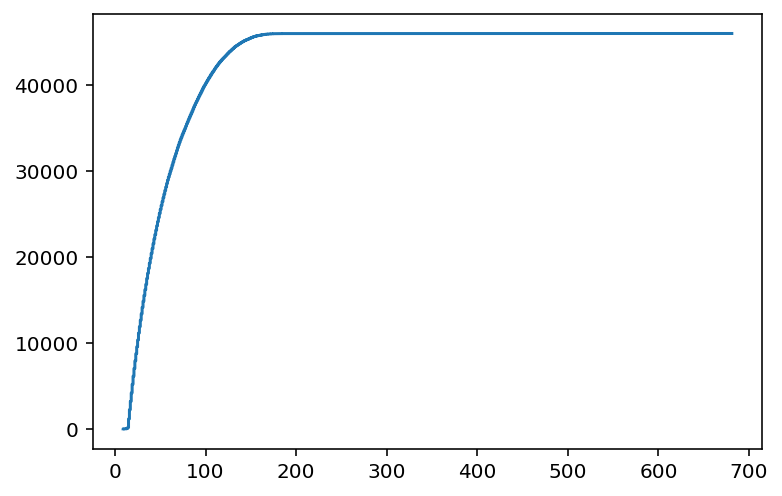

In [17]:
sorted_data = np.sort(most_active_users)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.show()

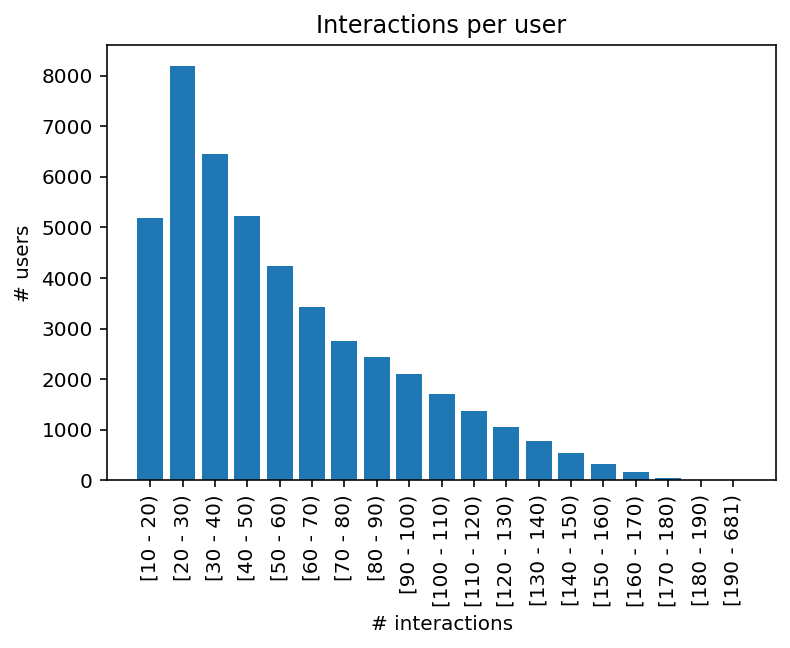

In [18]:
bins = (
    [10*i for i in range(1, 20)]
    + [users.max()]
)

hist, bins = np.histogram(users, bins)
x_axis = np.arange(0, len(hist))
plt.bar(x_axis, hist)
bin_names = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(hist))]
plt.xticks(x_axis, bin_names, rotation=90)

# Title and labels
plt.title("Interactions per user")
plt.xlabel("# interactions")
plt.ylabel("# users")
plt.show()

## Output

In [19]:
n_users = data["board_id"].nunique()
n_items = data["im_name"].nunique()
n_items_gt = 882017
print(f"Unique users: {n_users}")
print(f"Unique items: {n_items_gt}")
print(f"Unique items 'interacted': {n_items}")
print(f"Interactions per user: {users.mean()} +/- {users.std()}")
actual_mean = items.sum() / n_items_gt
actual_std = np.sqrt(np.mean(np.abs(items - actual_mean)**2))
print(f"Interactions per item: {actual_mean} +/- {actual_std}") 
print(f"Interactions per purchased item: {items.mean()} +/- {items.std()}")
possible_interactions = n_users * n_items_gt
print(f"Possible interactions: {possible_interactions}")
print(f"Sparsity: {100 * len(data) / possible_interactions:2f}%")

Unique users: 46000
Unique items: 882017
Unique items 'interacted': 882589
Interactions per user: 55.08273913043478 +/- 34.823345417873256
Interactions per item: 2.872740548084674 +/- 3.8686536084717664
Interactions per purchased item: 2.8708787442399575 +/- 3.868655352124064
Possible interactions: 40572782000
Sparsity: 0.006245%


In [20]:
data = data.rename(columns={
    "board_id": "user_id",
    "im_name": "item_id",
})
data["artist_id"] = -1
data = data[["user_id", "item_id", "artist_id", "timestamp"]]
data = data.sort_values("timestamp")
data = data.reset_index(drop=True)

In [21]:
data.to_csv("pinterest.csv", index=False)

In [22]:
data

,user_id,item_id,artist_id,timestamp
0,119134421331766936,58dcc5617e646ccd77205b4de9e01510,-1,1447729447
1,119134421331766936,3b4452fd784e93d337b74bdd36ff90bc,-1,1447729447
2,119134421331766936,8b3556819ee8e8d1adc3b1e0d417e24e,-1,1447729447
3,119134421331766936,a5dcb3a6e69a433a95917b874c61f977,-1,1447729447
4,119134421331766936,6b50d516cfafe9f1a9c28f676889dfe2,-1,1447729447
...,...,...,...,...
2533801,99994122915443980,e4c24b995f3c6d208ded88087705fc85,-1,1448114163
2533802,99994122915443980,432fecf9753fecfe252cf28d0856a161,-1,1448114163
2533803,99994122915443980,a03ae9e52454d43d7e621774bc2b9e18,-1,1448114163
2533804,99994122915443980,6d0b85f6c90be57fb1cc8938a7ac3b28,-1,1448114163
